In [423]:
import numpy as np
import PIL
import random
from PIL import Image
from PIL import ImageDraw
import pandas as pd

In [424]:
### Generate m random coordinates on a PIL Image. Returns as a list.
def random_points(image, m):
    coordinates = []
    for i in range(m):
        x_coord = random.randint(0,image.size[0])
        y_coord = random.randint(0,image.size[1])
        coordinates.append((x_coord,y_coord))
    return coordinates

In [425]:
### Generate an empty incidence matrix for a given list of coordinates and return it, this will be a numpy array
def incidence_matrix(coordinates):
    matrix = np.zeros((len(coordinates),len(coordinates)),dtype = np.int8)
    return matrix

In [426]:
image = Image.new("RGB", (500,500))
coordinates = random_points(image, 5)
matrix = incidence_matrix(coordinates)
matrix

array([[0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0]], dtype=int8)

In [427]:
matrix.shape[0]

5

In [428]:
matrix[0]

array([0, 0, 0, 0, 0], dtype=int8)

In [429]:
### Given an incidence matrix, a coordinate list and a PIL image draw lines of the given color
def draw_connections(matrix, coordinates, image, color):
    draw = PIL.ImageDraw.Draw(image,None)
    for x in range(matrix.shape[0]):
        for y in range(matrix.shape[1]):
            if matrix[x][y] == 1:
                draw.line([coordinates[x], coordinates[y]], fill=color, width=2, joint=None)
    return image

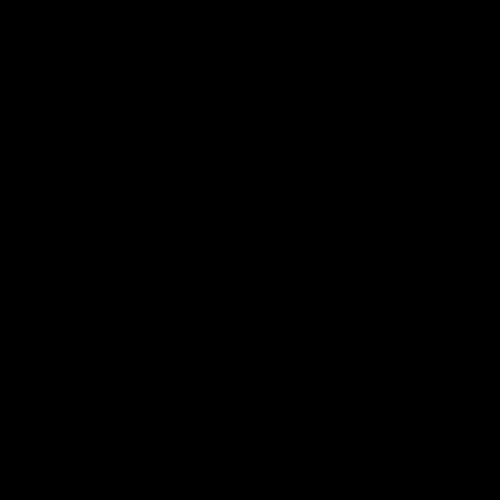

In [430]:
new_image = draw_connections(matrix,coordinates,image, (100,200,200))
new_image

In [431]:
### Given an incidence matrix return a new upper-triangular matrix with randomized conncetions
def random_connections(matrix):
    for x in range(matrix.shape[0]):
        for y in range(matrix.shape[1]):
            if y > x:
                matrix[x][y] = random.randint(0,1)
    return matrix

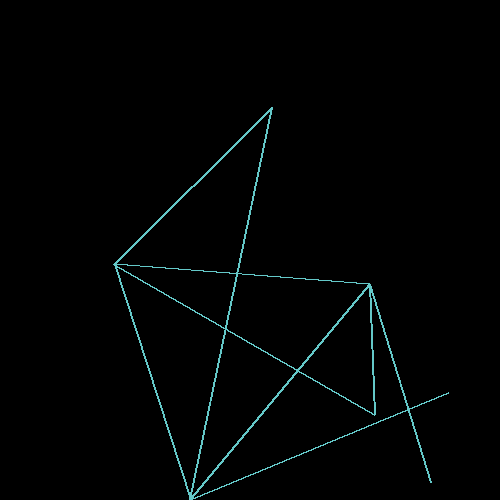

In [432]:
image = Image.new("RGB", (500,500))
coordinates = random_points(image, 7)
matrix = incidence_matrix(coordinates)
matrix = random_connections(matrix)
new_image = draw_connections(matrix,coordinates,image, (100,200,200))
new_image

In [433]:
### Take a list of coordinates and alter them, returning a new set of coordinates that are nudged in a random direction to a maximum
def random_nudge(coordinates, size, step):
    new_coords = []
    step = int(step)
    for coordinate in coordinates:
        x_budge = random.randint(-step,step)
        y_budge = random.randint(-step,step)
        
        new_x = max(0,coordinate[0]+x_budge)
        new_x = min(size[0], coordinate[0]+x_budge)
        
        new_y = max(0,coordinate[1]+y_budge)
        new_y = min(size[1], coordinate[1]+y_budge)
        
        #if coordinate[0]+x_budge > size[0]:
           # new_x = coordinate[0]
        #else:
            #if coordinate[0]+x_budge < 0:
                #new_x = coordinate[0]
            #else:
                #new_x = coordinate[0]+x_budge
            
        #if coordinate[1]+y_budge > size[1]:
            #new_y = coordinate[0]
        #else:
            #if coordinate[1]+y_budge < 0:
                #new_y = coordinate[1]
            #else:
                #new_y = coordinate[1]+y_budge
        
        new_coordinate = (new_x, new_y)
        new_coords.append(new_coordinate)
    
    return new_coords

In [434]:
rand_coord = random_nudge(coordinates, image.size)

TypeError: random_nudge() missing 1 required positional argument: 'step'

In [435]:
coordinates

[(369, 284),
 (114, 264),
 (190, 499),
 (448, 392),
 (430, 482),
 (272, 107),
 (374, 414)]

In [436]:
rand_coord

[(311, 246),
 (165, 249),
 (3, 396),
 (230, 108),
 (267, 456),
 (108, 348),
 (144, 95)]

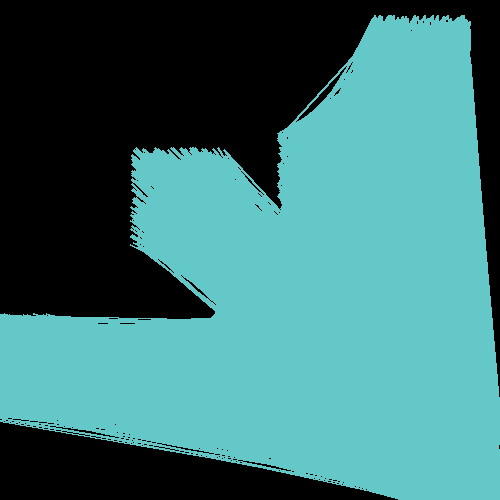

In [497]:
image = Image.new("RGB", (500,500))
coordinates = random_points(image, 6)
matrix = incidence_matrix(coordinates)
matrix = random_connections(matrix)
new_image = draw_connections(matrix,coordinates,image, (100,200,200))
for i in range(1000):
    new_coords = random_nudge(coordinates, new_image.size, 50)
    new_image = draw_connections(matrix, new_coords, new_image, (100,200,200))
new_image

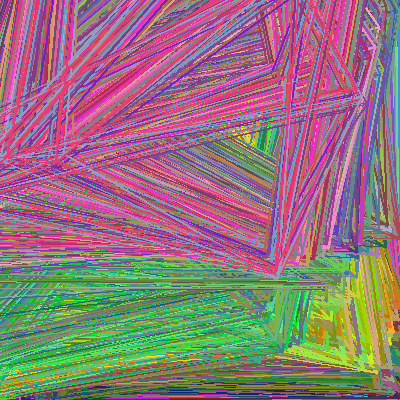

In [560]:
image = Image.new("RGB", (400,400))
coordinates = random_points(image, 10)
matrix = incidence_matrix(coordinates)
matrix = random_connections(matrix)
new_image = draw_connections(matrix,coordinates,image, (100,200,200))
new_coords = random_nudge(coordinates, new_image.size, 1)
for i in range(2000):
    new_coords = random_nudge(new_coords, new_image.size, 10)
    new_image = draw_connections(matrix, new_coords, new_image, (random.randint(60,195)+int(60*np.sin(i/100)),random.randint(60,195)+int(60*np.sin(i/200)),random.randint(60,195)+int(60*np.sin(i/300))))
new_image

In [543]:
new_image.save("Rubber_band_space_4.png")